200
[[48 48 50 ... 42 42 43]
 [47 46 49 ... 43 43 44]
 [50 49 50 ... 45 46 47]
 ...
 [19 16 23 ... 23 28 22]
 [21 12 19 ... 42 31 27]
 [25 16 19 ... 45 29 27]]


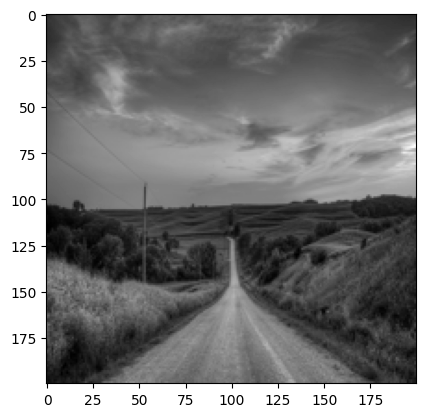

In [15]:
import numpy as np
import matplotlib.pyplot as plt
from PIL import Image
import urllib.request 

img = Image.open('image.jpeg').convert('L').resize((200, 200))
plt.imshow(img, cmap='gray')
arr = np.array(img)
print(np.linalg.matrix_rank(arr))

print(arr)


In [16]:
u, e, v = np.linalg.svd(img)

2.005 % space of the original image
4.01 % space of the original image
16.04 % space of the original image
25.0625 % space of the original image
70.175 % space of the original image


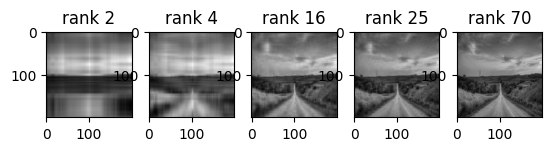

In [17]:
ranks = [2, 4, 16, 25, 70]
s, e, v = np.linalg.svd(arr)
e = np.diag(e)

all_images = []


def storage(num_rows, num_cols, rank):
    orig_img = num_rows * num_cols
    resized_img = num_rows*rank + num_cols*rank + rank
    print(f"{resized_img/orig_img * 100} % space of the original image")


for idx, rank in enumerate(ranks):
    try:
        fig = plt.subplot(1, 5, idx+1)
        rank_i_img = s[:, :rank] @ e[:rank, :rank] @ v[:rank, :]
        storage(arr.shape[0], arr.shape[1], np.linalg.matrix_rank(rank_i_img))
        all_images = rank_i_img
        fig.set_title(f"rank {rank}")
        fig.imshow(rank_i_img, cmap="gray")
    except ValueError:
        break


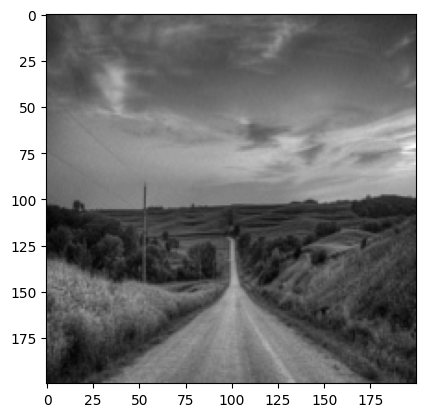

In [18]:
plt.imshow(all_images, cmap="gray")